### • Business Understanding

•  **Introduction:** The project involves working with the statistical data of the college students playing basketball. In this learning task, the goal is to predict whether a college basketball player will be drafted to join the NBA league based on their statistics.

The annual NBA draft is a highly anticipated event where NBA teams select players from American colleges and international professional leagues to join their rosters. Being drafted to the NBA is a significant achievement for any basketball player, marking a transition to the professional league. This event captures the attention of sports commentators, fans, and enthusiasts who eagerly track the careers of college players and speculate about their chances of being selected by NBA teams.


• **Dataset:** The dataset provided contains a wide range of features that illuminate players' performance during their college basketball season.
The dataset comprises 64 players' performance attributes, including Games Played (GP), Minutes Played (Min_per), Offensive Rating (ORtg), Defensive Rating (DRtg), Field Goals Made (twoPM), Free Throws Made (FTM), and many others offer insights into various facets of a player's playing style and contribution to their team.

        Basketball Players Metadata: metadata.csv
        Basketball Players Training dataset: train.csv
        Basketball Players Testing dataset: test.csv


• **Business Problem:** Build a Binary Classification predictive model capable of accuratly determining the likelihood of a college basketball player being drafted into the NBA based on their performance statistics from their records. The model's accurate predictions can provide valuable insights for both players and teams, aiding decision-making during the NBA draft process. Additionally, this model will offer valuable insights to sports commentators, fans, and scouts, aiding them in predicting the potential NBA draft prospects of individual players.

The primary evaluation metric for this task is the AUROC: Area Under the ROC (Receiver Operating Characteristic) Curve.

The subsequent activities are performed for this Binary Classification. 

• Business Understanding

• Data Understanding

        1] Loading Data
        2] Exploring Data

• Data Preparation

        3] Handling Missing Values
                - Treating missing values in numerical and categorical features 
                - Verifying and Removing Identifiers
        4] Predictors Selection
                - Analysing Correlation between predictors and target variable
                - Checking the outliers and distribution of values of the selected features
                - Selecting predictors
        5] Splitting Data into Different Sets
                - Accessing if imbalance and employing SMOTE for addressing
                - Selecting Target variable and Predictors
                - Splitting the sampled dataset into training - 80% and validation - 20%
        6] Features Scaling

## Exploratory Data Analysis (EDA)

Note: This notebook includes exploratory data analysis and data preperation activities.

In [1]:
# Importing Python and the necessary libraries
import pandas as pd
import numpy as np

# Importing necessary Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing SKLearn and other libraries necessary for the EDA and Modelling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing dump library from joblib
from joblib import dump

# Importing formatting and other required libraries
import os
import sys
import warnings

# Including the project root directory
sys.path.append('/Users/monalipatil/Monali/MDSI-Semester1/Advanced Machine Learning Application/Assignment1/adv_mla_assignment1')

# Importing class and functions defined to perform machine learning tasks
from src.data.sets import displaying_null_values, imputing_missing_with_mean, imputing_missing_with_mode, assessing_if_imbalance_dataset
from src.data.sets import pop_target_variable, oversampling_with_smote, train_validation_split, features_scaling, save_datasets

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#Ignoring warnings to maintain a clean coding.
warnings.filterwarnings('ignore')

### • Data Understanding

#### 1] Loading  Data

In [4]:
# Defining data files path 
# Note: Change this path to the relevant directory
absolute_path = os.path.abspath('/Users/monalipatil/Monali/MDSI-Semester1/Advanced Machine Learning Application/Assignment1/adv_mla_assignment1')

# Loading data into a pandas dataframe named 'df_basketball_players_train' and 'df_basketball_players_test'
df_basketball_players_train = pd.read_csv(absolute_path + '/data/raw/train.csv')
df_basketball_players_test = pd.read_csv(absolute_path + '/data/raw/test.csv')

#### 2] Exploring Data

• Checking some datapoints of the datasets.

In [5]:
# Displaying initial records of the training dataset
df_basketball_players_train.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [6]:
# Displaying initial records of the testing dataset
df_basketball_players_test.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360


#### Insights: 

* The basketball palyer's dataset contains diverse set of attributes that provide insights into a player's performance throughout their college basketball season which are basketball game domain specific.

* Attribute 'player_id' appears to serve as a variable intended for identification purposes.

* As this learning task is part of a Kaggle competition, it's notable that the target classes (represented by drafted variable) are absent from the test dataset.

•	Checking dimension of the datasets.

In [7]:
# Describing the dimension of the datasets
print('Basketball Players Training Dataset Size:', df_basketball_players_train.shape)
print('Basketball Players Testing Dataset Size:', df_basketball_players_test.shape)

Basketball Players Training Dataset Size: (56091, 64)
Basketball Players Testing Dataset Size: (4970, 63)


• Describing attributes names. 

In [8]:
# Checking attributes names of the datasets
print('Basketball Players Training Dataset Features Name:', df_basketball_players_train.columns)
print('\nBasketball Players Testing Dataset Features Name:', df_basketball_players_test.columns)

Basketball Players Training Dataset Features Name: Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year',
       'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'player_id', 'drafted'],
      dtype='object')

Basketball Players Testing Dataset Features Name: Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TP

#### Insight: 

* There are slightly over 56,000 instances with 64 attributes and their names are discribed in the above outcome.

• Describing summary information of the dataset.

In [9]:
# Checking summary information of the attributes of the dataset
df_basketball_players_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

• Checking summary statistics of the dataset.

In [10]:
# Checking statistical summary information for all variables of the dataset
df_basketball_players_train.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,56091,56091,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,...,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091,56091.000000
unique,358,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23929,NaN
top,Army,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06dc8dc2-888e-4941-9106-4798cddfb9d2,NaN
freq,209,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,...,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,NaN,0.009556
std,NaN,NaN,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,...,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,NaN,0.097287
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,...,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,NaN,0.000000
50%,NaN,NaN,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,...,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,NaN,0.000000
75%,NaN,NaN,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,...,1.066415,1.111100,2.758600,3.833300,1.533300,0.793100,0.366700,9.069000,NaN,0.000000


#### Insight: 

* The majority of the attributes are numeric in nature, with only a few being categorical.

• Inspecting if any null values in the datasets.

In [11]:
# Checking whether there are any null values in the training dataset
print('Missing values details of the Training Dataset:\n') 

# Invoking the function for training dataset
displaying_null_values(df_basketball_players_train)

Missing values details of the Training Dataset:

Total number of features with null values: 33

Features with null values:
 Index(['yr', 'ht', 'num', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
       'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'],
      dtype='object')

Features with null values and their counts:
yr: 274
ht: 80
num: 4669
Rec_Rank: 39055
ast_tov: 4190
rimmade: 6081
rimmade_rimmiss: 6081
midmade: 6081
midmade_midmiss: 6081
rim_ratio: 9464
mid_ratio: 9688
dunksmade: 6081
dunksmiss_dunksmade: 6081
dunks_ratio: 30793
pick: 54705
drtg: 44
adrtg: 44
dporpag: 44
stops: 44
bpm: 44
obpm: 44
dbpm: 44
gbpm: 44
mp: 38
ogbpm: 44
dgbpm: 44
oreb: 38
dreb: 38
treb: 38
ast: 38
stl: 38
blk: 38
pts: 38


In [12]:
# Checking whether there are any null values in the testing dataset
print('Missing values details of the Testing Dataset:\n') 

# Invoking the function for testing dataset
displaying_null_values(df_basketball_players_test)

Missing values details of the Testing Dataset:

Total number of features with null values: 24

Features with null values:
 Index(['ht', 'num', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
       'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'ogbpm', 'dgbpm'],
      dtype='object')

Features with null values and their counts:
ht: 6
num: 88
Rec_Rank: 3536
ast_tov: 537
rimmade: 248
rimmade_rimmiss: 248
midmade: 248
midmade_midmiss: 248
rim_ratio: 646
mid_ratio: 697
dunksmade: 248
dunksmiss_dunksmade: 248
dunks_ratio: 2717
pick: 4921
drtg: 1
adrtg: 1
dporpag: 1
stops: 1
bpm: 1
obpm: 1
dbpm: 1
gbpm: 1
ogbpm: 1
dgbpm: 1


#### Insight: 

* A significant number of 33 attributes in the training dataset and 24 in the testing dataset possess missing values, necessitating addressing to ensure data readiness for modeling.

* These attributes with missing values comparises of both numerical and categorical types.

• Examining if any duplicate values in the datasets.

In [13]:
# Checking duplicate values in the datasets
print('Duplicates in Training Dataset :', df_basketball_players_train.duplicated().sum())
print('Duplicates in Testing Dataset :', df_basketball_players_test.duplicated().sum())

Duplicates in Training Dataset : 0
Duplicates in Testing Dataset : 0


#### Insight: 

* No duplicate values are present in the datasets.

### • Data Preparation

#### 3] Handling Missing Values

•  Treating missing values in numerical and categorical features.

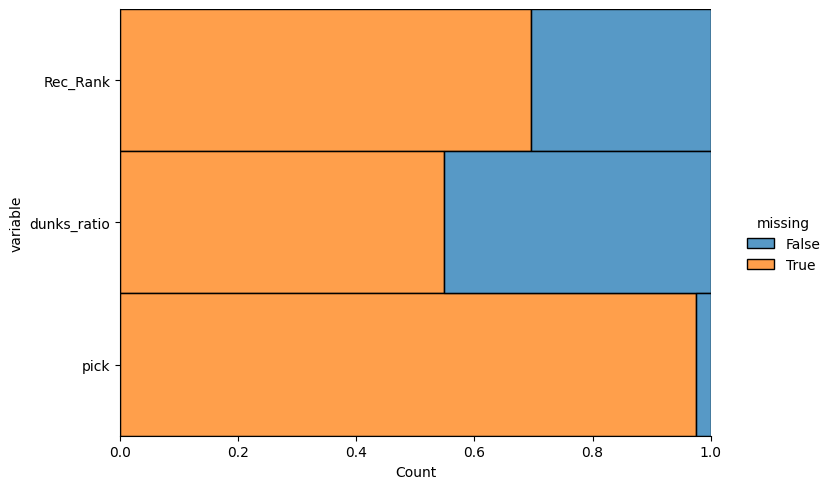

In [14]:
# Handing missing values in the certain numerical features
handling_features = ['Rec_Rank', 'dunks_ratio', 'pick']

# Displaying features with significant high missing values
sns.displot(data=df_basketball_players_train[handling_features].isna().melt(value_name="missing"), y="variable", multiple="fill", hue="missing", aspect=1.5)

#### Rationale:

* Among the features with missing data, the following three attributes exhibit notably high levels of missing values, exceeding 50%.

  - Rec_Rank: Training -> 69.55% (39055/56091) and Testing -> 71.15% (3536/4970)

  - dunks_ratio: Training -> 54.89% (30793/56091) and Testing -> 54.64% (2717/4970)

  - pick: Training -> 97.64% (54705/56091) and Testing -> 98.98% (4921/4970)

* Therefore, it is practical to exclude these features in order to prevent potential biases in the model arising from imputation.

•  Dropping certain features with significant missing values.

In [15]:
# Removing 'Rec_Rank', 'dunks_ratio', 'pick' features from the datasets 
df_basketball_players_train.drop(['Rec_Rank', 'dunks_ratio', 'pick'], axis=1, inplace=True) 
df_basketball_players_test.drop(['Rec_Rank', 'dunks_ratio', 'pick'], axis=1, inplace=True)

#### Rationale: 

* Given that the remaining features have missing values comprising less than 2%, it is a reasonable approach to fill these missing values using the mean for numerical attributes and the mode for categorical attributes.

• Tackling categorical feature's missing values.

In [16]:
# Handing missing values in the certain categorical features
handling_features = ['yr', 'ht']

# Invoking function to impute the categorical missing values with mode
df_basketball_players_train[handling_features] = imputing_missing_with_mode(df_basketball_players_train[handling_features])
df_basketball_players_test[handling_features] = imputing_missing_with_mode(df_basketball_players_test[handling_features])

• Tackling numerical feature's missing values.

In [17]:
# Handing missing values in the rest numerical features
handling_features_train = ['ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 
                            'dunksmade', 'dunksmiss_dunksmade', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 
                            'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']

handling_features_test = ['ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 
                          'dunksmade', 'dunksmiss_dunksmade', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 
                          'gbpm', 'ogbpm', 'dgbpm']

# Invoking function to impute the numerical missing values with mean
df_basketball_players_train[handling_features_train] = imputing_missing_with_mean(df_basketball_players_train[handling_features_train])
df_basketball_players_test[handling_features_test] = imputing_missing_with_mean(df_basketball_players_test[handling_features_test])

• Verifying and Removing Identifiers.

#### Rationale: 

* Attributes 'player_id' and 'num' are unique identifiers for each basketball player, and its inclusion in the analysis can lead to overfitting, where the model fits to these specific values rather than the underlying generalized patterns in the sportsman's records. 

* Additionally, 'team' and 'conf' attributes representing the names of teams and conferences, are overly specific and do not contribute to the model's general learning.

* Therefore, removing 'player_id', 'num', 'team' and 'conf' features from the datasets.

In [18]:
# Creating a copy of the original datasets
df_train = df_basketball_players_train.copy()
df_test = df_basketball_players_test.copy()

In [19]:
# Removing 'team', 'conf', 'num', 'player_id' features from the datasets 
df_train.drop(['team', 'conf', 'num', 'player_id'], axis=1, inplace=True) 
df_test.drop(['team', 'conf', 'num', 'player_id'], axis=1, inplace=True)

#### 4] Predictors Selection

#### Rationale:

* Performing correlation analysis to determine which features would be most valuable for building a predictive model for the NBA draft prediction task. 

* Correlation using heatmap, calculates the correlation between each feature and the target variable 'drafted' to understand how much they influence the target. Features with high correlations to the target variable are potentially valuable and are selected as predictors.

• Analysing correlation between predictors and the target variable.

<Axes: >

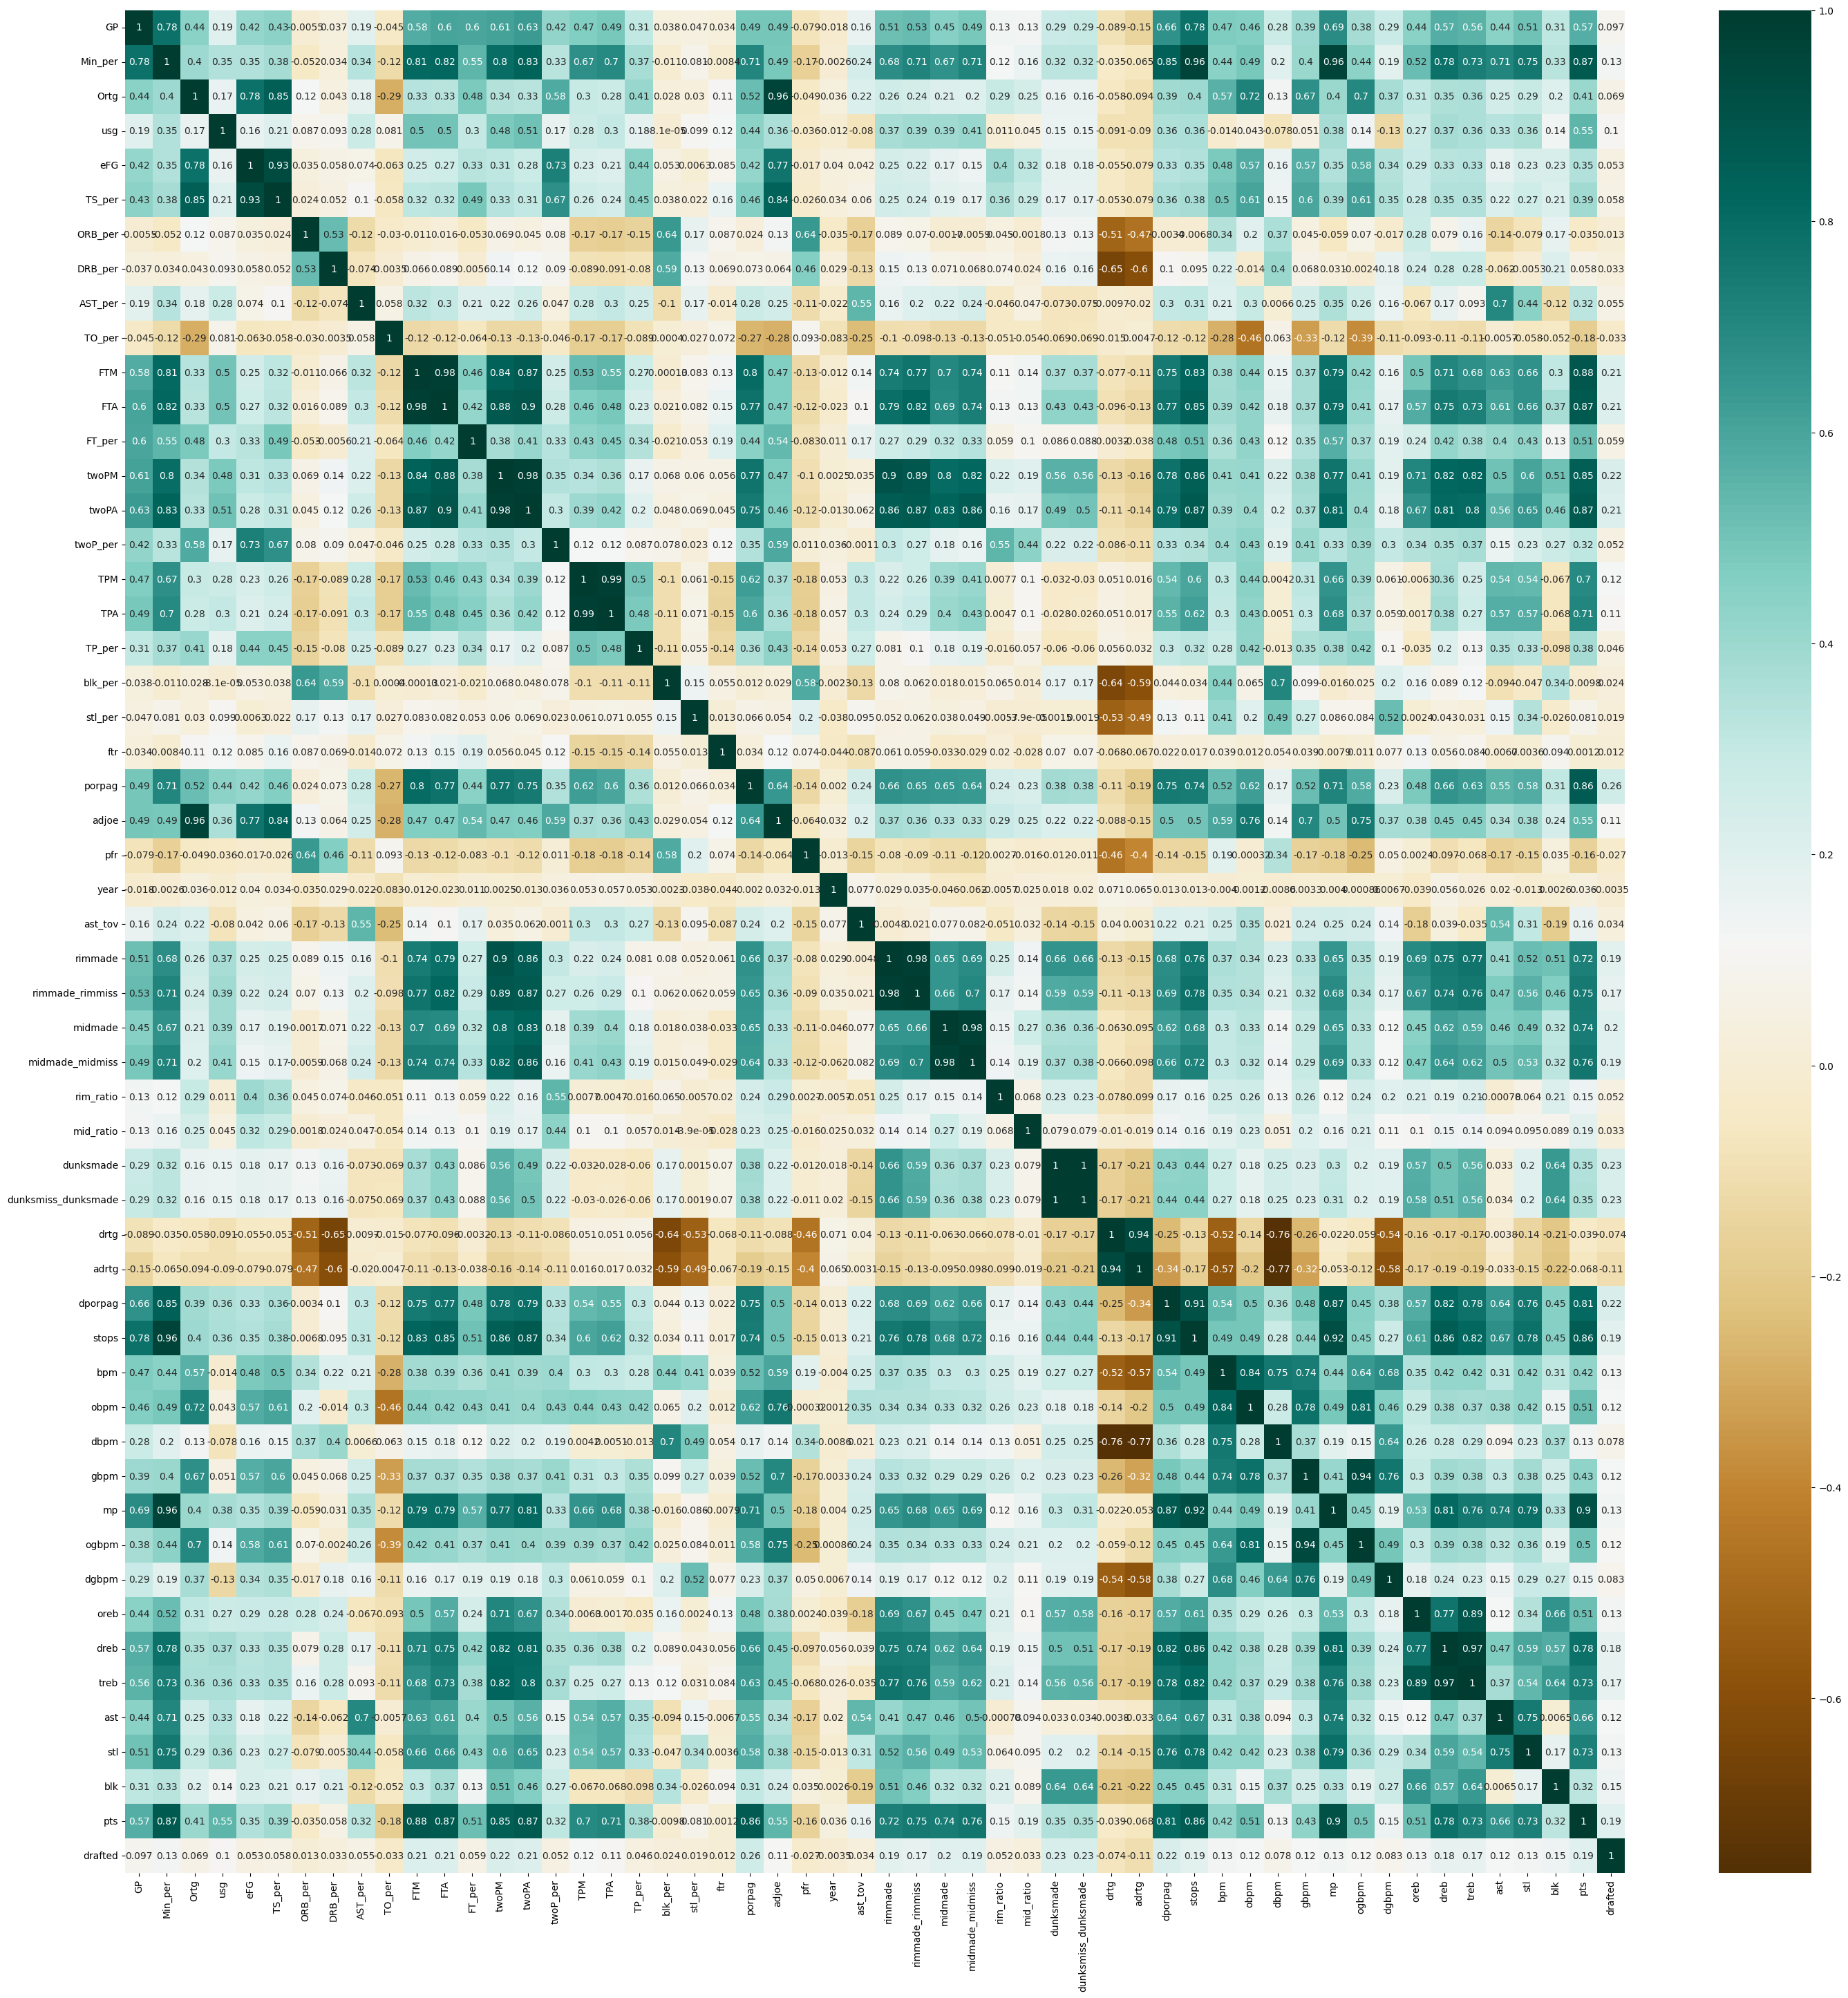

In [20]:
# Generating a heatmap to display the correlation between the target variable 'drafted' and different features in the dataset
plt.figure(figsize=(35, 35))
sns.heatmap(df_train.corr(), annot=True, cmap='BrBG')

•  Analysing the distribution of selected features. 

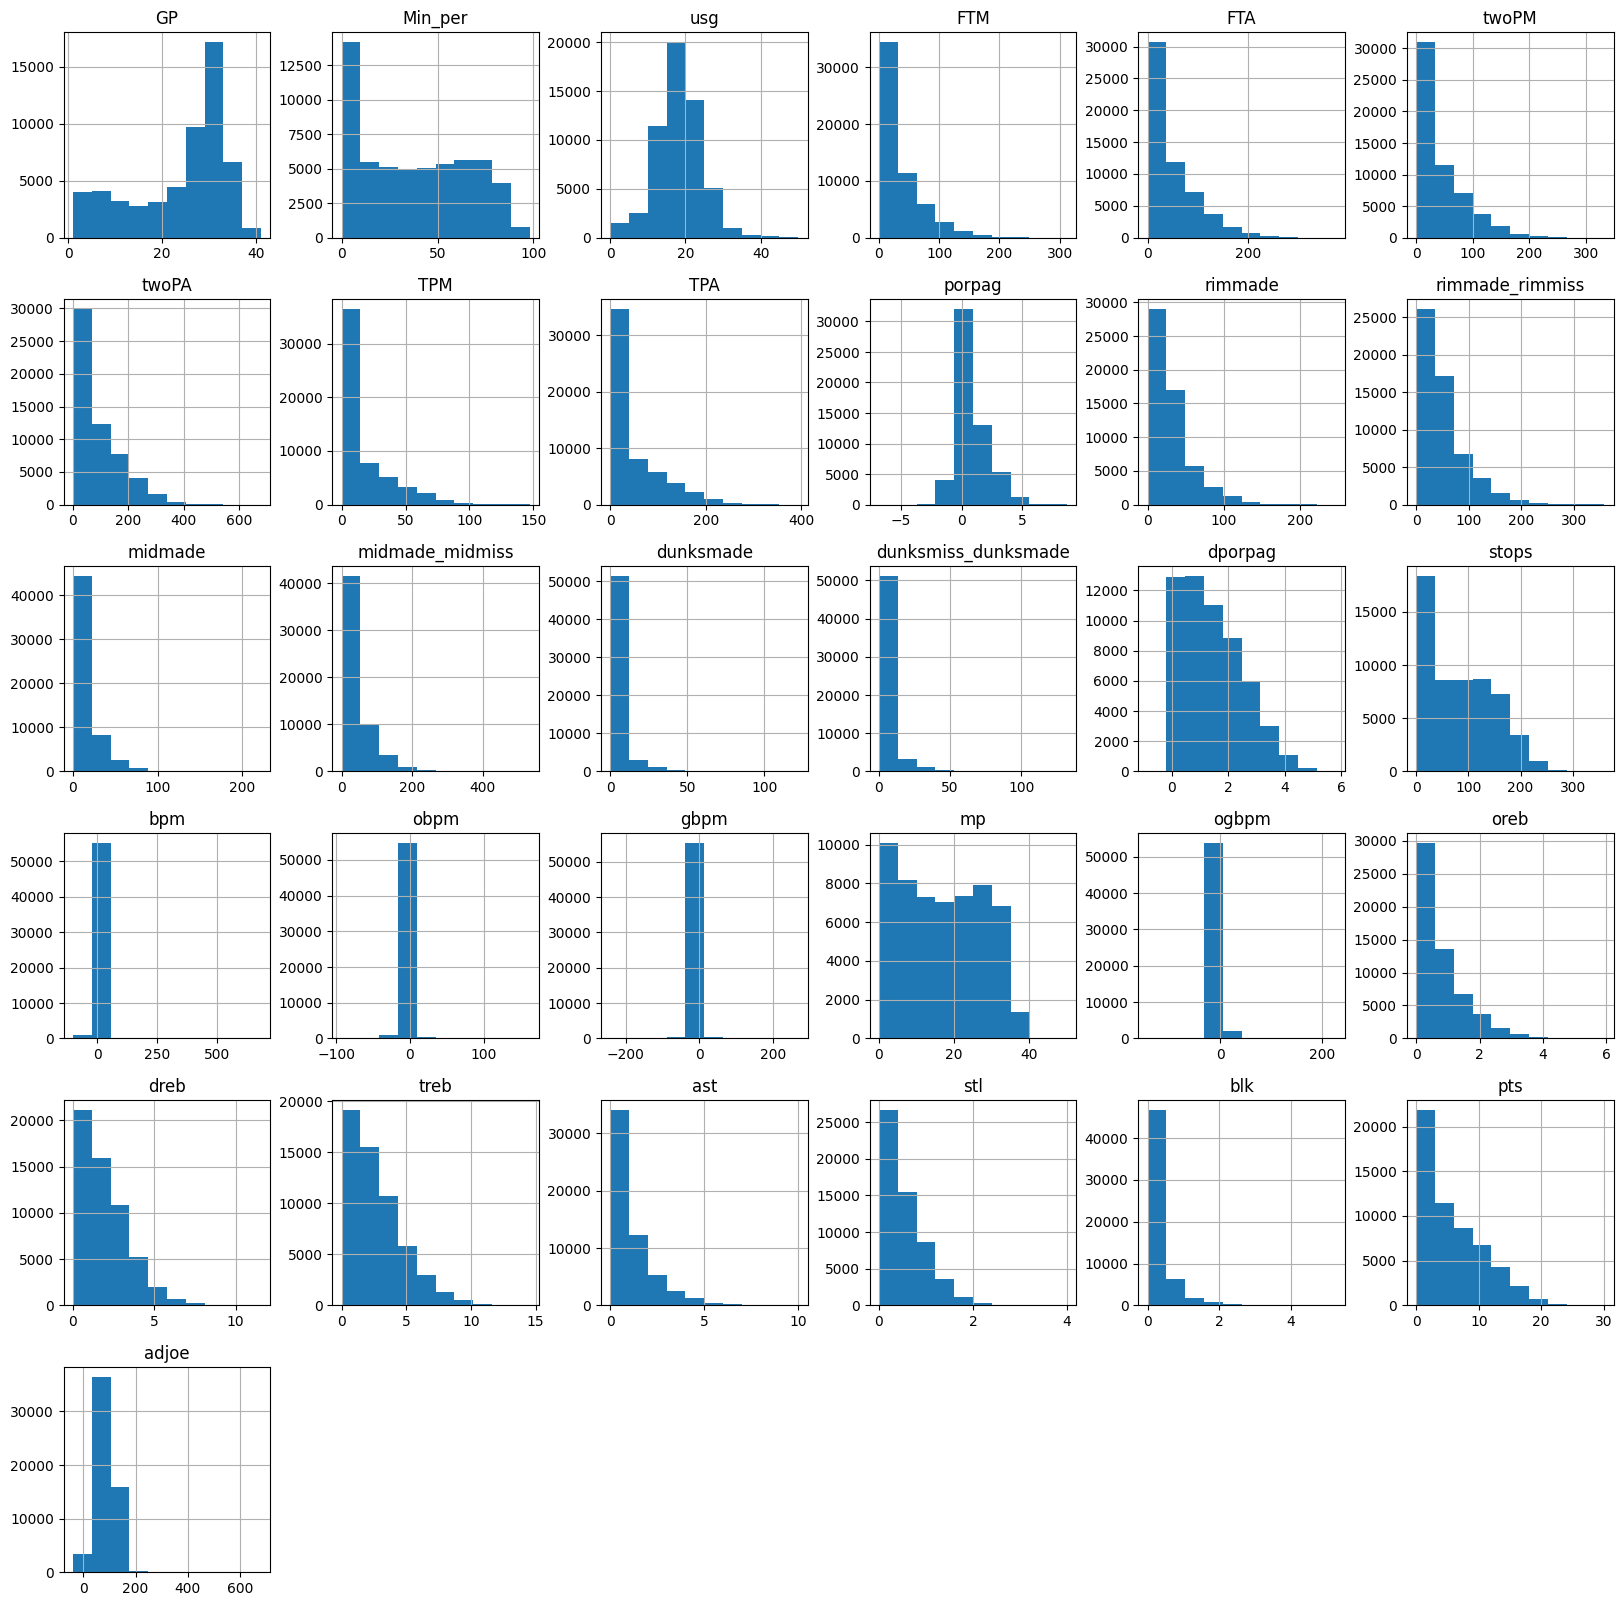

In [21]:
# Selecting features with high corelation values 
df_selected_features = ['GP', 'Min_per', 'usg', 'FTM', 'FTA', 'twoPM', 'twoPA', 'TPM', 'TPA', 
                        'porpag', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 
                        'dunksmade', 'dunksmiss_dunksmade', 'dporpag', 'stops', 'bpm', 'obpm', 
                        'gbpm', 'mp', 'ogbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 
                        'pts', 'adjoe']

# Creating histogram of the selected numerical features
histogram = df_train[df_selected_features].hist(figsize=(20,20))

#### Insight: 

* Considering the dataset of player statistical records, the data is fairly well distributed.

•  Selecting predictors. 

In [22]:
# Selecting desired features with high corelation values as predictors for training and testing dataset
df_train_data = df_train[df_selected_features]
df_test_data = df_test[df_selected_features]

# Creating additional copy of test dataset to be used for the kaggle submission results
df_testing = df_test[df_selected_features]

# Adding 'player_id' feature to the testing dataset needed for the kaggle submission results
df_testing['player_id'] = df_basketball_players_test['player_id']

# Adding 'drafted' target variable to the training dataset 
df_train_data['drafted'] = df_train['drafted']

#### 5] Splitting Data into Different Sets

•  Accessing if imbalance and employing SMOTE for addressing.


Number of classes within the target variable:
 0.0    55555
1.0      536
Name: drafted, dtype: int64


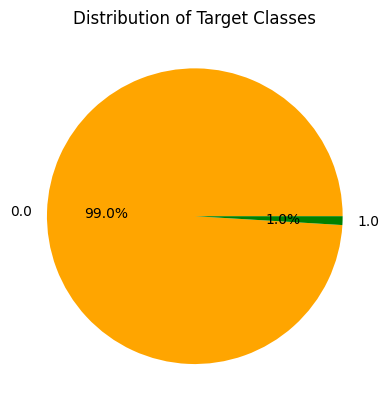

In [23]:
# Invoking the function for accessing classes of target variable 
assessing_if_imbalance_dataset(df_train_data, 'drafted')

#### Insight: 

* The pie chart above illustrates a significant class imbalance within the dataset. The majority of observations are attributed to a single target class, representing players who have not been drafted denoted by the value 0.

• Selecting Target variable and Predictors.

In [24]:
# Invoking the function to extract the target variable 'drafted' into 'y' variable and 'X' variable with all the features
X, y = pop_target_variable(df_train_data, 'drafted')

# Creating 'X_test' variable with all the features for test dataset
X_test = df_test_data

#### Rationale: 

* Performing Oversampling with SMOTE (Synthetic Minority Over-sampling Technique) method to address class imbalance by generating synthetic observations for the minority class. 

* It works by creating synthetic samples that are similar to existing observations in the minority class without duplicating the existing observations, rather it generates new observations by interpolating between existing ones.

In [25]:
# Invoking the function to handle the issue of imbalanced target classes using the SMOTE oversampling technique
X_train_resampled, y_train_resampled = oversampling_with_smote(X, y)


Verifying the number of claases within the target variable post oversmapling

Class 0 count: 55555
Class 1 count: 55555


#### Rationale:

* Generating a validation set offers flexibility for multiple experiments and facilitates comparing the model's performance on training and validation sets to detect overfitting or underfitting. 

* Additionally, it allows to fine-tune the model's hyperparameters and retrain it iteratively to achieve satisfactory performance utilizing the validation set.

• Splitting the sampled dataset into training - 80% and validation - 20%

In [26]:
# Dividing the resampled data into training set (80%) and validation set (20%)
X_train, X_validate, y_train, y_validate = train_validation_split(X_train_resampled, y_train_resampled, 0.2)

• Verify dimensions of the datasets following the splitting process.

In [27]:
# Confirming the dimensions of the datasets post splitting features
print('Predictors:')
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)

print('\nTarget Variable:')
print(y_train.shape)
print(y_validate.shape)

Predictors:
(88888, 31)
(22222, 31)
(4970, 31)

Target Variable:
(88888,)
(22222,)


#### 6] Features Scaling

#### Rationale:

* Using feature scaling prevents the algorithm from prioritizing high-value features over other more informative ones. It ensures uniformity in feature values, enabling the algorithm to learn generalized patterns from all features for accurate player identification and predictions.

* Employing StandardScaler method because it maintains the features data distribution's shape and retains outliers by scaling data using the mean of 0 and standard deviation of 1 across the entire dataset, rather than for individual data points.

In [28]:
# Invoking the function to scale the features values
X_train, X_validate, X_test, scaler = features_scaling(X_train, X_validate, X_test)

# Storing the scaler in the models directory and naming the file as 'scaler.joblib'
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

• Storing the datasets in the data/processed directory.

In [29]:
# Invoking the function to store the prepared datasets in the data/processed directory
save_datasets(X_train, y_train, X_validate, y_validate, X_test, None, path='../data/processed/')